In [100]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

In [19]:
BASE_DIR = "/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/preunfolded_2017/Nominal/emu"

In [46]:
b1k_preunfolded = uproot.open(BASE_DIR + "/b1k.root")

In [47]:
b1k_preunfolded["b1kReco"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=175320, variance=2738.68)

In [48]:
b1k_preunfolded["b1kRecoBg"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=11334.5, variance=2416.46)

In [27]:
c_kk_preunfolded = uproot.open(BASE_DIR + "/c_kk.root")

In [28]:
c_kk_preunfolded["c_kkReco"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=175320, variance=2738.68)

In [29]:
c_kk_preunfolded["c_kkRecoBg"].to_hist()

Hist(Regular(48, 0.5, 48.5, name='xaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=11334.5, variance=2416.46)

In [101]:
b1k_MC_unfolded   = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/self_consistency/b1k.root")
b1k_data_unfolded = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2017/Nominal/combined/b1k.root")

In [102]:
b1k_MC_unfolded["b1kTUnfResultCor_rebinnedB"].to_hist()

Hist(Regular(6, 0.5, 6.5, name='xaxis', label='b1k(rec)[GeV]'), storage=Weight()) # Sum: WeightedSum(value=830.232, variance=16.298)

In [103]:
b1k_data_unfolded["b1kTUnfResultCor_rebinnedB"].to_hist()

Hist(Regular(6, 0.5, 6.5, name='xaxis', label='b1k(rec)[GeV]'), storage=Weight()) # Sum: WeightedSum(value=833.786, variance=8.75971)

In [104]:
b1k_MC_unfolded["b1kTheoryXsec"].to_hist()

Hist(Regular(6, 0.5, 24.5, name='xaxis', label='b1k(rec)[GeV]'), storage=Weight()) # Sum: WeightedSum(value=829.635, variance=0.00536876) (WeightedSum(value=829.671, variance=0.0417115) with flow)

In [105]:
MC_unf_result  = b1k_MC_unfolded["b1kTUnfResultCor_rebinnedB"].to_numpy()[0]
MC_theory_pred = b1k_MC_unfolded["b1kTheoryXsec"].to_numpy()[0] 

In [106]:
Data_unf_result  = b1k_data_unfolded["b1kTUnfResultCor_rebinnedB"].to_numpy()[0]
Data_theory_pred = b1k_data_unfolded["b1kTheoryXsec"].to_numpy()[0] 

In [125]:
b1k_data_unfolded["b1kTUnfResultCor_rebinnedB"].to_hist()

Hist(Regular(6, 0.5, 6.5, name='xaxis', label='b1k(rec)[GeV]'), storage=Weight()) # Sum: WeightedSum(value=833.786, variance=8.75971)

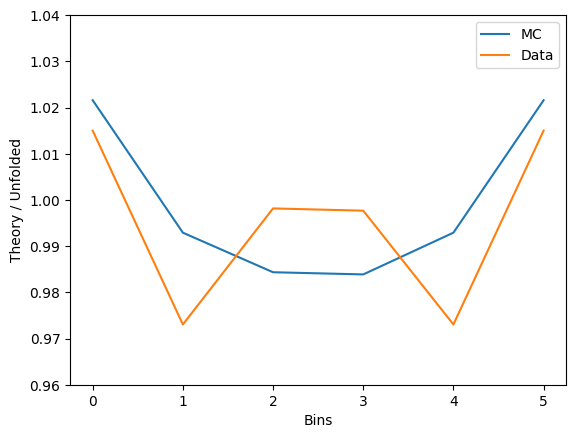

In [124]:
plt.plot(np.divide(MC_theory_pred  , MC_unf_result  ), label = "MC")
plt.plot(np.divide(Data_theory_pred, Data_unf_result), label = "Data")
plt.ylabel("Theory / Unfolded")
plt.xlabel("Bins")
plt.ylim(0.96,1.04)
plt.legend()

In [94]:
sum(np.divide(MC_unf_result, MC_theory_pred))/6

1.000720957630503

In [108]:
signal     = b1k_preunfolded["b1kReco"].to_numpy()[0]
background = b1k_preunfolded["b1kRecoBg"].to_numpy()[0]

In [96]:
1 + sum(background)/sum(signal)

1.0646505463440328

In [97]:
bg_subtracted_signal = signal - background

In [121]:
theory_pred_48_bins = np.ones(len(bg_subtracted_signal)) * (sum(bg_subtracted_signal) /len(bg_subtracted_signal))

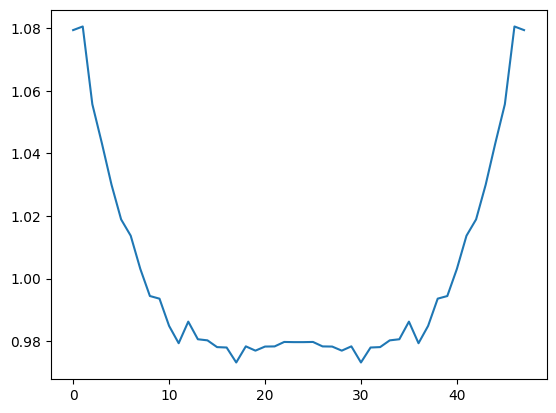

In [142]:
plt.plot(np.divide(theory_pred_48_bins, (bg_subtracted_signal)))

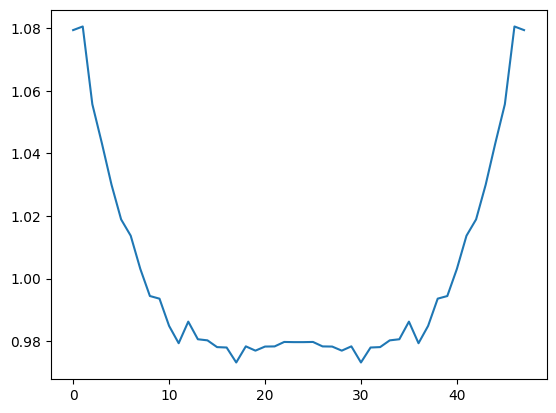

In [137]:
plt.plot(np.divide(theory_pred_48_bins, (signal - background)))

In [115]:
gen    = b1k_preunfolded["b1kGen"].to_numpy()[0]
visgen = b1k_preunfolded["b1kVisGen"].to_numpy()[0]

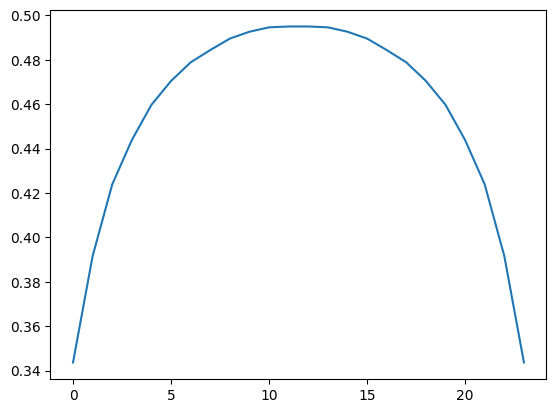

In [118]:
plt.plot(np.divide(visgen, gen))